__Submitted by:- Harshada Jadhav
Reg.no:- 19111544 Class:4BBA-C__

__Description about the dataset__

In [1]:
import pandas as pd
import numpy as np
import math
from pathlib import Path
from pathlib import Path
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


__Basic Description__

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\ESE_2.csv')
df.head() #gives whole idea about the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape #describes the number of columns and rows

(1000, 5)

In [5]:
df.columns #all the columns in dataset

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
df.describe()#describes the dataset and what is it is about

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [13]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

__Handling Missing Values__

In [14]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing

,column_name,missing_count
0,R&D Spend,0
1,Administration,0
2,Marketing Spend,0
3,State,0
4,Profit,0


_Here we can see that there are no missing values in the data_

__Handling of Outliers__

__Identitying Outliers through Visualization and treating them by Replacing Outliers with Median Values__


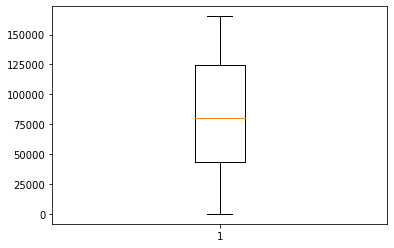

In [23]:
plt.boxplot(df["R&D Spend"])
plt.show()


_No outliers in Column of R&D_

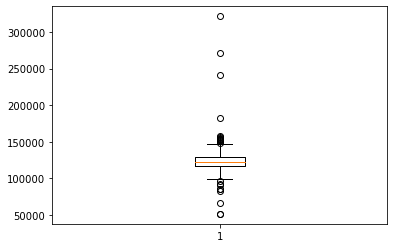

In [24]:
plt.boxplot(df["Administration"])
plt.show()

In [28]:
print(df['Administration'].quantile(0.50)) 
print(df['Administration'].quantile(0.95)) 
df['Administration'] = np.where(df['Administration'] > 297, 128, df['Administration'])
df.describe()

122421.61215
133373.96525


,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.0,1000.000000,1000.000000
mean,81668.927200,128.0,226205.058419,119546.164656
std,46537.567891,0.0,91578.393542,42888.633848
min,0.000000,128.0,0.000000,14681.400000
25%,43084.500000,128.0,150969.584600,85943.198543
50%,79936.000000,128.0,224517.887350,117641.466300
75%,124565.500000,128.0,308189.808525,155577.107425
max,165349.200000,128.0,471784.100000,476485.430000


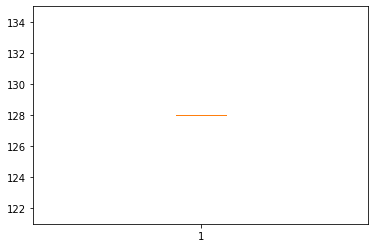

In [29]:
plt.boxplot(df["Administration"])
plt.show()

_So,here we can see that the outliers are treated_

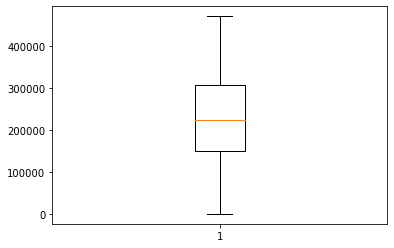

In [26]:
plt.boxplot(df["Marketing Spend"])
plt.show()

_No outliers in Column of Marketing Spending_

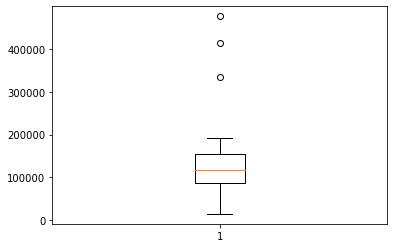

In [27]:
plt.boxplot(df["Profit"])
plt.show()

In [30]:
print(df['Profit'].quantile(0.50)) 
print(df['Profit'].quantile(0.95)) 
df['Profit'] = np.where(df['Profit'] > 297, 128, df['Profit'])
df.describe()

117641.4663
180530.04016499998


,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.0,1000.000000,1000.0
mean,81668.927200,128.0,226205.058419,128.0
std,46537.567891,0.0,91578.393542,0.0
min,0.000000,128.0,0.000000,128.0
25%,43084.500000,128.0,150969.584600,128.0
50%,79936.000000,128.0,224517.887350,128.0
75%,124565.500000,128.0,308189.808525,128.0
max,165349.200000,128.0,471784.100000,128.0


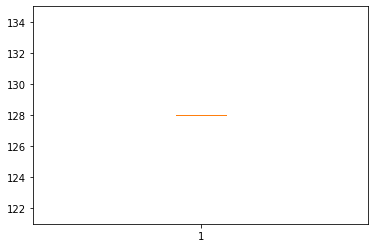

In [31]:
plt.boxplot(df["Profit"])
plt.show()

__Statistical Analysis__

In [32]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,128.0,471784.10,New York,128.0
1,162597.70,128.0,443898.53,California,128.0
2,153441.51,128.0,407934.54,Florida,128.0
3,144372.41,128.0,383199.62,New York,128.0
4,142107.34,128.0,366168.42,Florida,128.0


<AxesSubplot:>

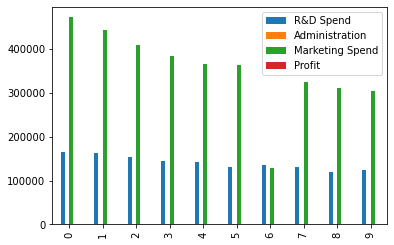

In [42]:
# Patterns with High Differences in Numerical Units
df[["R&D Spend", "Administration","Marketing Spend","State", "Profit"]].head(10).plot.bar()

<AxesSubplot:>

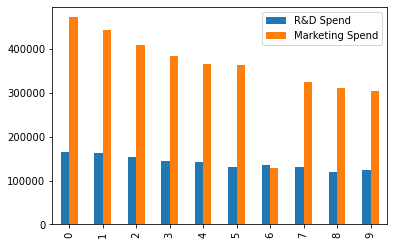

In [41]:
# Visualizing Patterns with Close Numerical Units
df[["R&D Spend","Marketing Spend"]].head(10).plot.bar()

#Comparison of R&D Spendind and Marketing Spending

_So,here we can see that the outliers are treated_

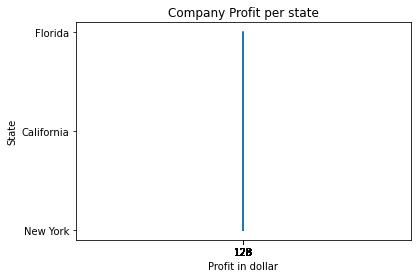

In [54]:
ProfitList = df ['Profit']
StateList  = df ['State']
plt.plot(ProfitList,StateList , label = 'State-wise Profit data')
plt.xlabel('Profit in dollar')
plt.ylabel('State')
plt.xticks(ProfitList)
plt.title('Company Profit per state')
plt.show()




_Here we can see that the straight line has came as the profit is same for all the states that is 128_

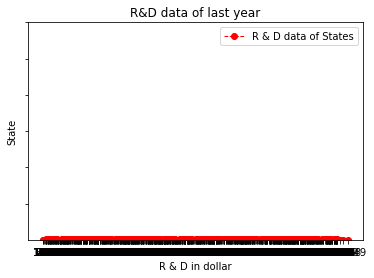

In [66]:
RDList = df ['R&D Spend']
stateList  = df ['State']

plt.plot(RDList,stateList, label = 'R & D data of States', 
      color='r', marker='o', linestyle='--', linewidth=1)
      
plt.xlabel('R & D in dollar')
plt.ylabel('State')
plt.legend()
plt.title('R&D data of last year')
plt.xticks(RDList)
plt.yticks([200, 400, 600, 800, 1000,1200])
plt.show()

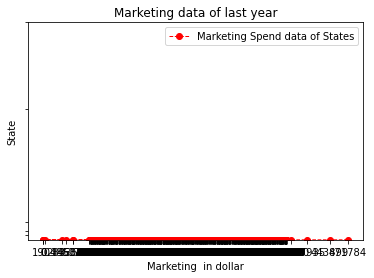

In [67]:
MarketingList = df ['Marketing Spend']
stateList  = df ['State']

plt.plot(MarketingList,stateList, label = 'Marketing Spend data of States', 
      color='r', marker='o', linestyle='--', linewidth=1)
      
plt.xlabel('Marketing  in dollar')
plt.ylabel('State')
plt.legend()
plt.title('Marketing data of last year')
plt.xticks(MarketingList)
plt.yticks([1000, 2000, 30000, 4000, 50000])
plt.show()

__Variable Categorizing__

_We found categorical data in the dataset and for the analysis we will have to convert it into numerical data_

In [72]:
states = pd.get_dummies(df['State'], drop_first = True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


__Preparing Data__

In [91]:
dummies=pd.get_dummies(df.State)

In [93]:
df=pd.concat([df,dummies],axis=1)

In [94]:
df.drop(['State'],axis=1,inplace=True)
df

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,128.0,471784.1000,128.0,0,0,1
1,162597.70,128.0,443898.5300,128.0,1,0,0
2,153441.51,128.0,407934.5400,128.0,0,1,0
3,144372.41,128.0,383199.6200,128.0,0,0,1
4,142107.34,128.0,366168.4200,128.0,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,128.0,173232.6695,128.0,1,0,0
996,134970.00,128.0,329204.0228,128.0,1,0,0
997,100275.47,128.0,227142.8200,128.0,1,0,0
998,128456.23,128.0,281692.3200,128.0,1,0,0


__Scaling__

In [98]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df[['R&D Spend','Administration']]=scale.fit_transform(df[['R&D Spend','Administration']])

In [100]:
y=df.iloc[:,2].values
y

array([471784.1    , 443898.53   , 407934.54   , 383199.62   ,
       366168.42   , 362861.36   , 127716.82   , 323876.68   ,
       311613.29   , 304981.62   , 229160.95   , 249744.55   ,
       249839.44   , 252664.93   , 256512.92   , 261776.23   ,
       264346.06   , 282574.31   , 294919.57   ,      0.     ,
       298664.47   , 299737.29   , 303319.26   , 304768.73   ,
       140574.81   , 137962.62   , 134050.07   , 353183.81   ,
       118148.2    , 107138.38   ,  91131.24   ,  88218.23   ,
        46085.25   , 214634.81   , 210797.67   , 205517.64   ,
       201126.82   , 197029.42   , 185265.1    , 174999.3    ,
       172795.67   , 164470.71   , 148001.11   ,  35534.17   ,
        28334.72   ,   1903.93   , 297114.46   ,      0.     ,
            0.     ,  45173.06   , 236937.1317 , 143589.7191 ,
       242316.5853 , 195132.5255 , 160862.6275 , 128099.6711 ,
       216156.3873 , 346478.8607 , 121415.8737 , 341016.4385 ,
       316407.5606 , 216694.7185 , 151917.4528 , 186391

df.drop(['Profit'],axis=1,inplace=True)
df

In [102]:
X=df.iloc[:,:].values
X.shape

(1000, 6)

__Splitting dataset into train and test__

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

__Fitting model to training set__

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

__Predicting the test dataset__

In [105]:
y_pred = lin_reg.predict(X_test)

__Finding coefficients and intercepts__

In [106]:

# coefficient 
print(lin_reg.coef_)

[-1.21878121e-10 -4.44089210e-16  1.00000000e+00 -1.55387899e-12
  3.09834791e-12 -1.54446892e-12]


In [107]:
# intercepts
print(lin_reg.intercept_)

2.6193447411060333e-10


__Evaluating the model__

In [108]:
# calculating the  R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [109]:
import statistics
SSE = sum((y_pred -  y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

1.0

In [112]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,159075.9080,159075.9080
1,156009.9281,156009.9281
2,170552.5902,170552.5902
3,354183.3651,354183.3651
4,146302.5999,146302.5999
